## AIM:
The objective is to classify Malicious (Type=1) websites from Benign (Type=0) ones on the basis of various features given in the dataset.<br>
Target variable: `"TYPE"`

## Features:
`URL`: it is the anonimous identification of the URL analyzed in the study <br>
`URL_LENGTH`: it is the number of characters in the URL <br>
`NUMBERSPECIALCHARACTERS`: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=” <br>
`CHARSET`: it is a categorical value and its meaning is the character encoding standard (also called character set). <br>
`SERVER`: it is a categorical value and its meaning is the operative system of the server got from the packet response. <br>
`CONTENT_LENGTH`: it represents the content size of the HTTP header. <br>
`WHOIS_COUNTRY`: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois). <br>
`WHOIS_STATEPRO`: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois). <br>
`WHOIS_REGDATE`: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM <br>
`WHOISUPDATEDDATE`: Through the Whois we got the last update date from the server analyzed <br>
`TCPCONVERSATIONEXCHANGE`: This variable is the number of TCP packets exchanged between the server and our honeypot client <br>
`DISTREMOTETCP_PORT`: it is the number of the ports detected and different to TCP <br>
`REMOTE_IPS`: this variable has the total number of IPs connected to the honeypot <br>
`APP_BYTES`: this is the number of bytes transfered <br>
`SOURCEAPPPACKETS`: packets sent from the honeypot to the server <br>
`REMOTEAPPPACKETS`: packets received from the server <br>
`APP_PACKETS`: this is the total number of IP packets generated during the communication between the honeypot and the server <br>
`DNSQUERYTIMES`: this is the number of DNS packets generated during the communication between the honeypot and the server <br>
`TYPE`: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites <br>

## Approach:
1) Explore the data <br>
2) Clean the relevant data <br>
3) Check imbalances (if any) <br>
4) Use resampling technqiues to resolve imbalances <br>
5) Feature Engineering and Feature Selection <br>
6) Try and finalize a Machine Learning Model <br>
7) Validate our results on Cross-Validation set <br>
8) Final Inferences and Conclusion <br>

#### Importing the required packages and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS Dibimbing/Extra Class Supervised/dataset.csv') # importing the dataset

In [ ]:
df.head() # checking the head

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [ ]:
df.info() # checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [ ]:
df.isna().sum() # Checking the missing values per column

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

#### Checking the imbalance in target variable

In [ ]:
100 * df['Type'].value_counts()/len(df)

0    87.871982
1    12.128018
Name: Type, dtype: float64

There is a high imbalance towards Type=0 class. The ratio is around 88%-12%. We'll fix this later using SMOTE.

## Exploratory Data Analysis (EDA)

In [ ]:
df.describe() # checking the descriptive stats for each numerical feature

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


### Now let's try finding any trend of other features with respect to Target variables

### 1) Type vs Number of special characters

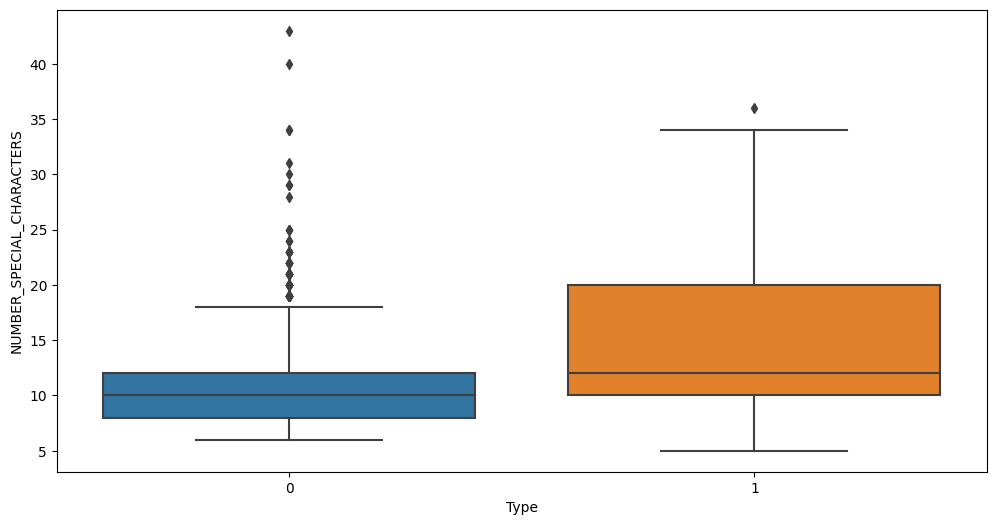

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Type',y='NUMBER_SPECIAL_CHARACTERS');

### Inference:
The number of special characters for Malicious website is higher than benign ones.

### 2) Type vs URL length

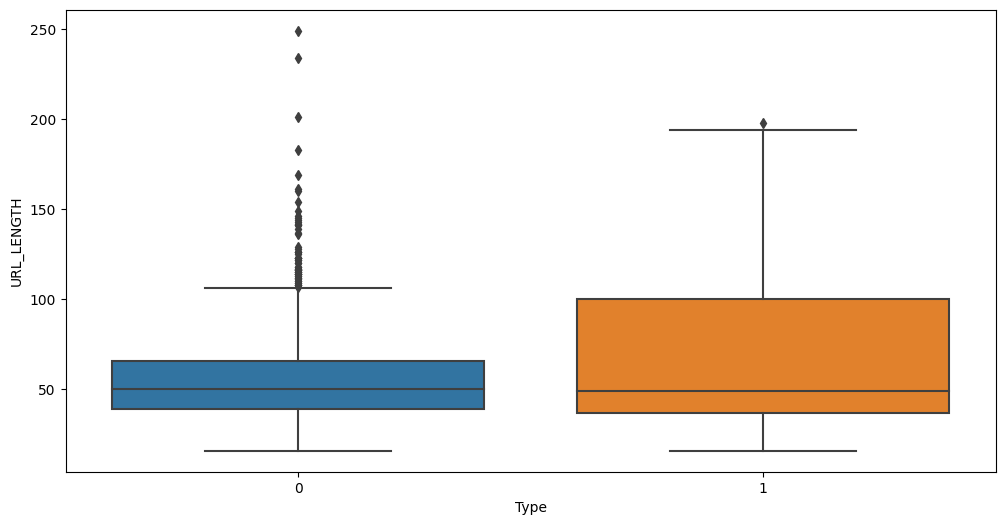

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Type',y='URL_LENGTH');

#### Inference:
The mean length of URL is higher for Malicious website as compared to benign ones.

## Let's do a bit of Data processing and then continue with EDA

#### Let's see how many unique categories are there in each categorical column

In [ ]:
for i in df.select_dtypes(include='object').columns:
    print(f"{i} -> {df[i].nunique()}")

URL -> 1781
CHARSET -> 9
SERVER -> 239
WHOIS_COUNTRY -> 49
WHOIS_STATEPRO -> 182
WHOIS_REGDATE -> 891
WHOIS_UPDATED_DATE -> 594


#### Let's create some custom functions to only keep top 5 category in each categorical column and then applying these function to their respective columns

In [ ]:
df['CHARSET'].value_counts()

UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [ ]:
def CHARSET_CLEANER(x):
    if x not in ['UTF-8','ISO-8859-1','utf-8','us-ascii','iso-8859-1']:
        return "OTHERS"
    else:
        return x

In [ ]:
df['CHARSET'] = df['CHARSET'].apply(CHARSET_CLEANER)

In [ ]:
df['CHARSET'].value_counts()

UTF-8         676
ISO-8859-1    427
utf-8         379
us-ascii      155
iso-8859-1    134
OTHERS         10
Name: CHARSET, dtype: int64

In [ ]:
df['SERVER'].value_counts()

Apache                                                                             386
nginx                                                                              211
None                                                                               175
Microsoft-HTTPAPI/2.0                                                              113
cloudflare-nginx                                                                    94
                                                                                  ... 
Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips DAV/2 mod_bwlimited/1.4      1
gunicorn/19.7.1                                                                      1
Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4      1
Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1                  1
Apache/2.2.16 (Debian)                                                               1
Name: SERVER, Length: 239, dtype: int64

In [ ]:
def SERVER_CLEANER(x):
    if x not in ['Apache','nginx','None','Microsoft-HTTPAPI/2.0','cloudflare-nginx']:
        return "OTHERS"
    else:
        return x

In [ ]:
df['SERVER'] = df['SERVER'].apply(SERVER_CLEANER)

In [ ]:
df['SERVER'].value_counts()

OTHERS                   802
Apache                   386
nginx                    211
None                     175
Microsoft-HTTPAPI/2.0    113
cloudflare-nginx          94
Name: SERVER, dtype: int64

In [ ]:
df['WHOIS_STATEPRO'].value_counts()[:7]

CA           372
None         362
NY            75
WA            65
Barcelona     62
FL            61
Arizona       58
Name: WHOIS_STATEPRO, dtype: int64

In [ ]:
def STATE_CLEANER(x):
    if x not in ['CA','None','NY','WA','Barcelona','FL']:
        return "OTHERS"
    else:
        return x

In [ ]:
df['WHOIS_STATEPRO'] = df['WHOIS_STATEPRO'].apply(STATE_CLEANER)

In [ ]:
df['WHOIS_STATEPRO'].value_counts()

OTHERS       784
CA           372
None         362
NY            75
WA            65
Barcelona     62
FL            61
Name: WHOIS_STATEPRO, dtype: int64

In [ ]:
def DATE_CLEANER(x):
    if x == 'None':
        return "Absent"
    else:
        return "Present"

In [ ]:
df['WHOIS_REGDATE'] = df['WHOIS_REGDATE'].apply(DATE_CLEANER)

In [ ]:
df['WHOIS_UPDATED_DATE'] = df['WHOIS_UPDATED_DATE'].apply(DATE_CLEANER)

In [ ]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,Present,Absent,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,OTHERS,15087.0,None,None,Absent,Absent,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,Absent,Absent,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,OTHERS,Present,Present,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,OTHERS,Present,Present,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [ ]:
df.drop(['URL','WHOIS_COUNTRY'],axis=1,inplace=True)

In [ ]:
df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,Present,Absent,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,OTHERS,15087.0,None,Absent,Absent,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,Absent,Absent,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,OTHERS,Present,Present,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,OTHERS,Present,Present,57,2,5,4278,61,62,129889,4586,61,4.0,0


## EDA continued

### 3) Correlation Heat map

<ipython-input-30-5c3bc044403f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),cmap='plasma',annot=True)


<Axes: >

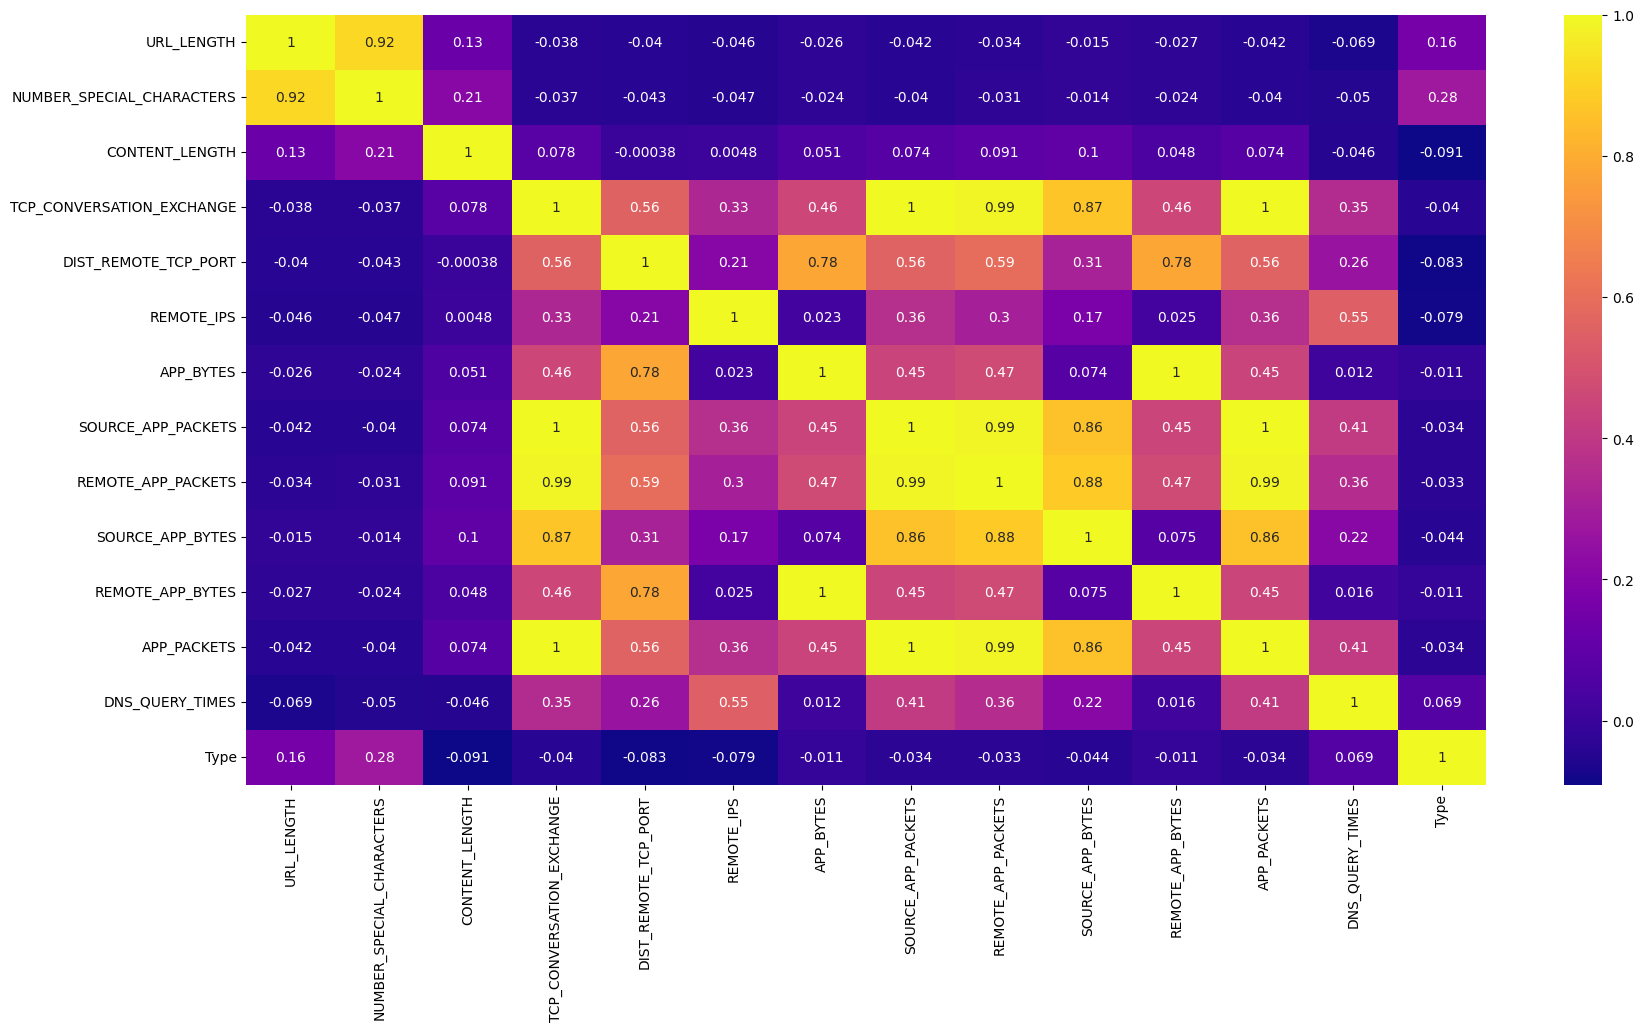

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),cmap='plasma',annot=True)

#### Although we can see some highly correlated features, it won't be wise to remove them all as that could lead us to significant loss in drawing out inferences. Hence, we'll only remove those columns which won;t have much impact on analysis and frther modelling

#### Since Content Length is not significantly correlated with any of the features and also contains a lot of missing values. It would be good if we drop it out.

In [ ]:
df2 = df.copy() # creating a copy of our dataframe

In [ ]:
df2.drop("CONTENT_LENGTH",axis=1,inplace=True) # dropping the column which is not required

## Feature Engineering and Feature Selection

#### Changing categorical column into dummies

In [ ]:
df3 = df2.copy() # creating a copy of the dataframe

In [ ]:
df3 = pd.get_dummies(df3,columns=['WHOIS_UPDATED_DATE','WHOIS_REGDATE','WHOIS_STATEPRO','SERVER','CHARSET'],drop_first=True) # creating dummies

In [ ]:
df3.head() # checking the head

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,SERVER_Microsoft-HTTPAPI/2.0,SERVER_None,SERVER_OTHERS,SERVER_cloudflare-nginx,SERVER_nginx,CHARSET_OTHERS,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8
0,16,7,7,0,2,700,9,10,1153,832,...,0,0,0,0,1,0,0,1,0,0
1,16,6,17,7,4,1230,17,19,1265,1230,...,0,0,1,0,0,0,1,0,0,0
2,16,6,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,17,6,31,22,3,3812,39,37,18784,4380,...,0,0,0,0,1,0,0,0,0,0
4,17,6,57,2,5,4278,61,62,129889,4586,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
df3.isna().sum() # checking for any missing value

URL_LENGTH                      0
NUMBER_SPECIAL_CHARACTERS       0
TCP_CONVERSATION_EXCHANGE       0
DIST_REMOTE_TCP_PORT            0
REMOTE_IPS                      0
APP_BYTES                       0
SOURCE_APP_PACKETS              0
REMOTE_APP_PACKETS              0
SOURCE_APP_BYTES                0
REMOTE_APP_BYTES                0
APP_PACKETS                     0
DNS_QUERY_TIMES                 1
Type                            0
WHOIS_UPDATED_DATE_Present      0
WHOIS_REGDATE_Present           0
WHOIS_STATEPRO_CA               0
WHOIS_STATEPRO_FL               0
WHOIS_STATEPRO_NY               0
WHOIS_STATEPRO_None             0
WHOIS_STATEPRO_OTHERS           0
WHOIS_STATEPRO_WA               0
SERVER_Microsoft-HTTPAPI/2.0    0
SERVER_None                     0
SERVER_OTHERS                   0
SERVER_cloudflare-nginx         0
SERVER_nginx                    0
CHARSET_OTHERS                  0
CHARSET_UTF-8                   0
CHARSET_iso-8859-1              0
CHARSET_us-asc

In [ ]:
df3.dropna(inplace=True) # dropping all the missing values

### Using SMOTE to extrapolate our model

`About SMOTE`: Synthetic Minority Oversampling Technique (SMOTE) is a resampling technique which oversamples the minority class by "synthesizing" various parameters and creating new data points by using various "data augmentation" techniques. By this, we get enough numbers of minority class data points to sufficiently carry out the learning processes for the ML model. Hence, we avoid data duplication of minority class (which is the case in oversampling).  

In [ ]:
# Importing the SMOTE function
from imblearn.over_sampling import SMOTE

In [ ]:
# Creating the set of independent features and target variable
X = df3.drop("Type",axis=1)
y = df3['Type']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  # importing the Under Sampling function

In [ ]:
# We shall keep undersampled majority class 50% more than the oversampled minority class.
# This is being done on order to resemble the composition of original dataframe in the SMOTE's dataframe
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
from imblearn.pipeline import Pipeline # Importing the pipeline

In [ ]:
# Initializing the SMOTE function. We set our SMOTE function to oversample the minority to the number equal to the majority class.
#Then, we take 50% of the oversampled minority class (randomly sampled).
oversample = SMOTE(sampling_strategy=0.5)

In [ ]:
steps = [('o',oversample),('u',undersample)] # steps for pipelining. First "do oversampling of the minority class" and then do "undersampling of the majority class"

In [ ]:
pipeline = Pipeline(steps=steps) # Creating the pipeline instance

In [ ]:
X_smote, y_smote = pipeline.fit_resample(X,y) # Fitting the pipeline to our dataset

In [ ]:
y_smote.value_counts() # Taking value counts of the targte feature

0    1564
1     782
Name: Type, dtype: int64

In [ ]:
len(X_smote) # checking the total number of samples we have

2346

In [ ]:
X_smote.shape # checking the shape

(2346, 30)

### SMOTE has been implemented. Now, we'll start the modelling by first creating a hold-out train and test set and then using stratified cross validation to cover all possibilities

In [ ]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_validate  # Implementing the required functions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # creating a test holdout set

In [ ]:
from sklearn.preprocessing import StandardScaler # import the standard scaling function

In [ ]:
sc = StandardScaler() # creating an instance of the scaling function

In [ ]:
X_train = sc.fit_transform(X_train) # fitting and transform the training set
X_test = sc.transform(X_test) # just transforming the testing set to avoid 'data leakage'

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,fbeta_score,make_scorer,precision_score,recall_score
# importing all the metric scores required for evaluation

In [ ]:
# creating a dictionary to evaluate metric over stratified k-fold cv
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

### We'll be using tree based ensemble models as they are immune to multicollinearity

### Note: We're interested in a model which has high recall as we want to minimize Error at the same time keeping R2 high as well. Hence, we need to find a `sweet spot` while evaluating our model

### 1) XGB

In [ ]:
from xgboost import XGBRegressor # importing the function
from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error)
xgb = XGBRegressor(random_state=42)

In [ ]:
learning_rate_list = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

learning_rate = []
rmse_score = []


for eta in learning_rate_list:
  xgb = XGBRegressor(learning_rate=eta,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  learning_rate.append(eta)


#create dataset eta
df_eta = pd.DataFrame({'learning_rate':learning_rate,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_eta,x='learning_rate',y='rmse_score')
plt.title('Tuning Learning Rate (eta) XGBoost')
plt.ylim(0,55)
plt.show()

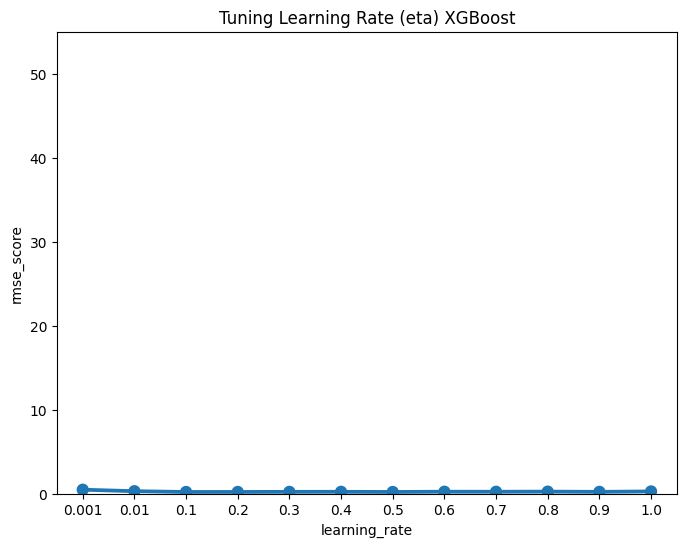

In [ ]:
eta = 0.1

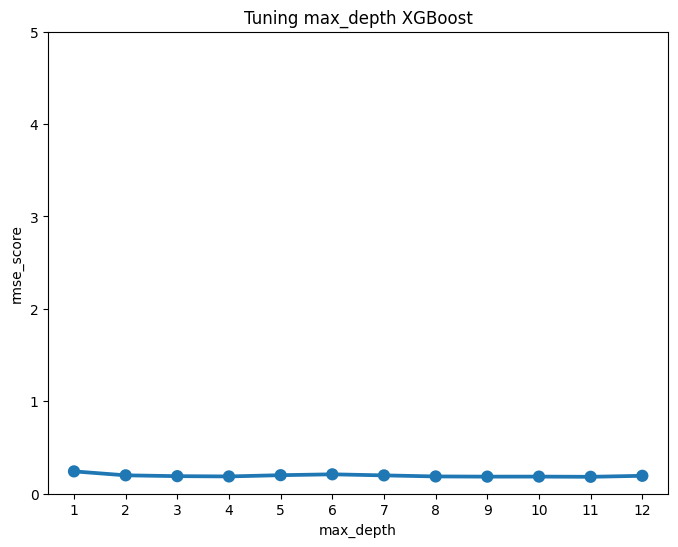

In [ ]:
max_depth = []
rmse_score = []

for depth in range(1,13):
  xgb = XGBRegressor(max_depth=depth,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  max_depth.append(depth)


#create dataset eta
df_max_depth = pd.DataFrame({'max_depth':max_depth,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_max_depth,x='max_depth',y='rmse_score')
plt.title('Tuning max_depth XGBoost')
plt.ylim(0,5)
plt.show()

In [ ]:
eta = 0.1
max_depth = 3

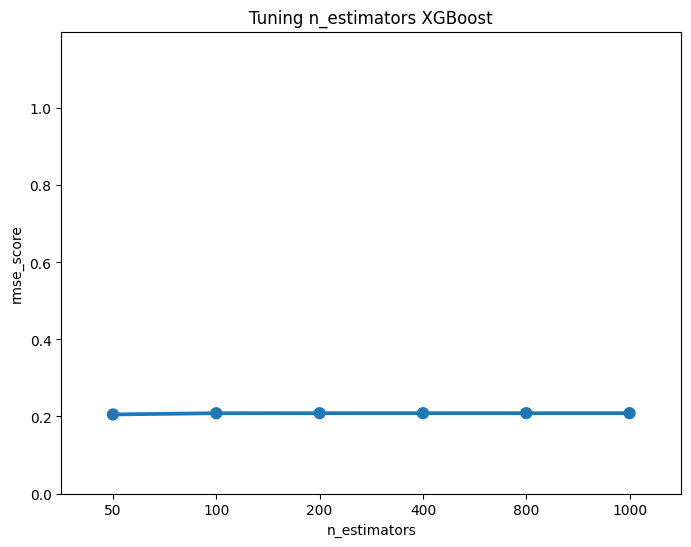

In [ ]:
n_estimators = []
rmse_score = []

for estimator in [50, 100, 200, 400, 800,1000]:
  xgb = XGBRegressor(n_estimators=estimator).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  n_estimators.append(estimator)


#create dataset eta
df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_estimator,x='n_estimators',y='rmse_score')
plt.title('Tuning n_estimators XGBoost')
plt.ylim(0,max(df_estimator['rmse_score'])+0.99)
plt.show()

In [ ]:
eta = 0.1
max_depth = 3
n_estimators = 100

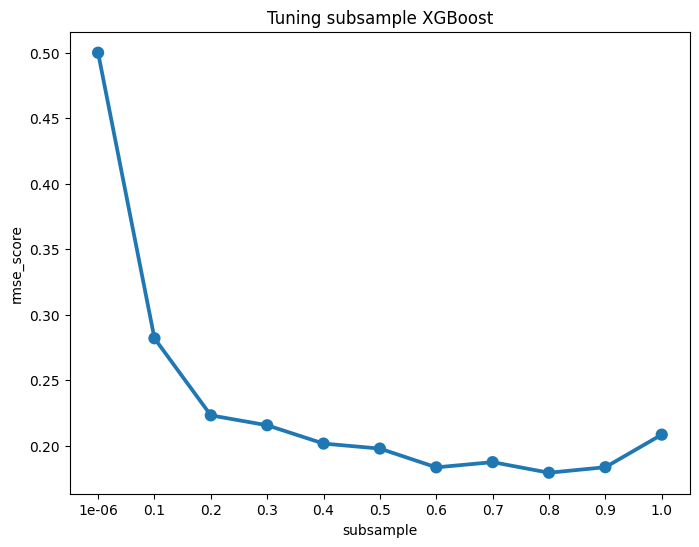

In [ ]:
subsample = []
rmse_score = []

for sub in [0.000001,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1]:
  xgb = XGBRegressor(subsample=sub,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  subsample.append(sub)


#create dataset eta
df_subsample = pd.DataFrame({'subsample':subsample,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_subsample,x='subsample',y='rmse_score')
plt.title('Tuning subsample XGBoost')
plt.show()

In [ ]:
eta = 0.1
max_depth = 3
n_estimators = 100
subsample = 0.8

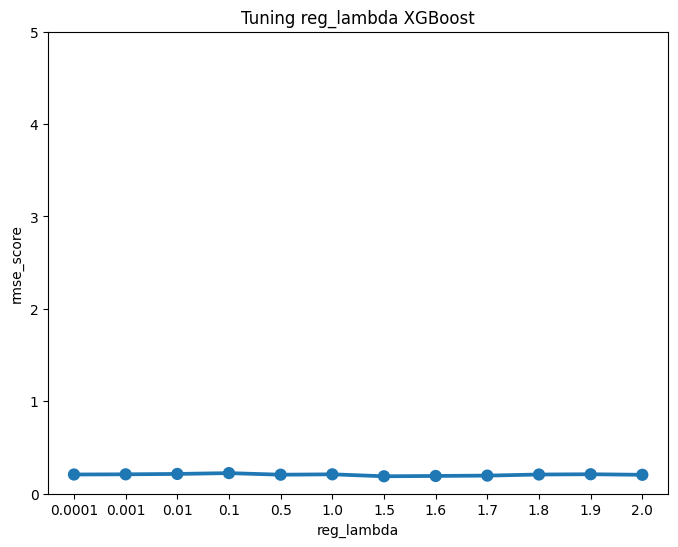

In [ ]:
reg_lambda = []
rmse_score = []

for lambda_ in [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2]:
    xgb = XGBRegressor(reg_lambda=lambda_,random_state=42).fit(X_train,y_train)
    rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
    rmse_score.append(rmse)
    reg_lambda.append(lambda_)


#create dataset eta
df_reg_lambda = pd.DataFrame({'reg_lambda':reg_lambda,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_reg_lambda,x='reg_lambda',y='rmse_score')
plt.title('Tuning reg_lambda XGBoost')
plt.ylim(0,5)
plt.show()

In [ ]:
eta = 0.1
max_depth = 3
n_estimators = 100
subsample = 0.8
reg_lambda = 0.5

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train,y_train)


predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9995313033293132
r2 score test 0.6514732380911675
MAE train 0.003942117686722086
MAE test 0.088135689909409
MSE train 4.776241558767663e-05
MSE test 0.04347234449765516
RMSE train 0.006911035782549287
RMSE test 0.20850022661295878


In [ ]:
xgb = XGBRegressor(learning_rate = eta,
                  max_depth = max_depth,
                  n_estimators = n_estimators,
                  subsample = subsample,
                  reg_lambda = reg_lambda,
                  random_state=42)

In [ ]:
xgb.fit(X_train,y_train)


predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.8475498517761535
r2 score test 0.7111521502716216
MAE train 0.060625739917280076
MAE test 0.09665790719050113
MSE train 0.015535393765867447
MSE test 0.0360284907879861
RMSE train 0.12464105971094536
RMSE test 0.1898117245798744


### 2) Catboost

In [ ]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier # importing the function

Learning rate set to 0.186865
0:	learn: 0.5400331	total: 1.89ms	remaining: 92.5ms
1:	learn: 0.3780154	total: 3.51ms	remaining: 84.2ms
2:	learn: 0.2492731	total: 5.9ms	remaining: 92.4ms
3:	learn: 0.1929092	total: 9.85ms	remaining: 113ms
4:	learn: 0.1706627	total: 16ms	remaining: 144ms
5:	learn: 0.1516314	total: 19ms	remaining: 139ms
6:	learn: 0.1432064	total: 21.3ms	remaining: 131ms
7:	learn: 0.1384511	total: 23.3ms	remaining: 122ms
8:	learn: 0.1278287	total: 25.2ms	remaining: 115ms
9:	learn: 0.1237504	total: 27.1ms	remaining: 108ms
10:	learn: 0.1154849	total: 29ms	remaining: 103ms
11:	learn: 0.1039075	total: 30.8ms	remaining: 97.6ms
12:	learn: 0.0975448	total: 32.8ms	remaining: 93.4ms
13:	learn: 0.0930308	total: 34.6ms	remaining: 89ms
14:	learn: 0.0902981	total: 36.4ms	remaining: 84.9ms
15:	learn: 0.0831969	total: 38.1ms	remaining: 81ms
16:	learn: 0.0821587	total: 39.8ms	remaining: 77.3ms
17:	learn: 0.0792660	total: 41.6ms	remaining: 73.9ms
18:	learn: 0.0766691	total: 43.3ms	remaining:

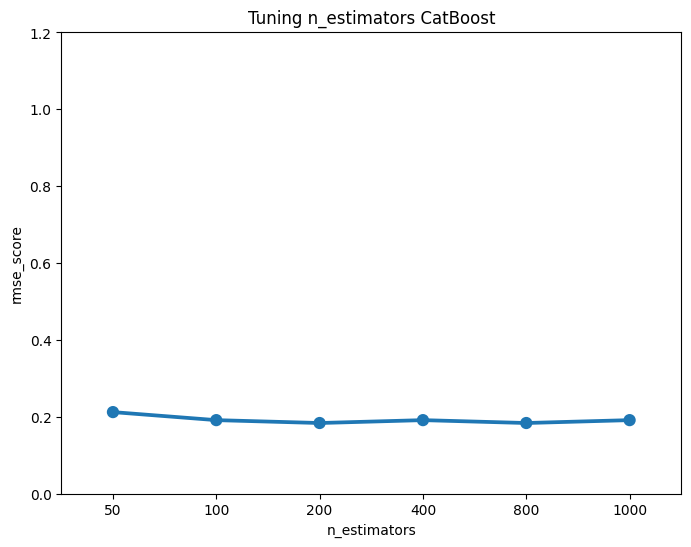

In [ ]:
n_estimators = []
rmse_score = []

for estimator in [50, 100, 200, 400, 800,1000]:
  cb = CatBoostClassifier(n_estimators=estimator).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,cb.predict(X_test)))
  rmse_score.append(rmse)
  n_estimators.append(estimator)


#create dataset eta
df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_estimator,x='n_estimators',y='rmse_score')
plt.title('Tuning n_estimators CatBoost')
plt.ylim(0,max(df_estimator['rmse_score'])+0.99)
plt.show()

In [ ]:
n_estimator = 200

Output streaming akan dipotong hingga 5000 baris terakhir.
0:	learn: 0.2812852	total: 1.81ms	remaining: 1.81s
1:	learn: 0.1433188	total: 3.78ms	remaining: 1.89s
2:	learn: 0.1207591	total: 6.72ms	remaining: 2.23s
3:	learn: 0.1058155	total: 9.13ms	remaining: 2.27s
4:	learn: 0.1035205	total: 17.5ms	remaining: 3.48s
5:	learn: 0.0883882	total: 21.3ms	remaining: 3.52s
6:	learn: 0.0804917	total: 24.8ms	remaining: 3.52s
7:	learn: 0.0681050	total: 30ms	remaining: 3.71s
8:	learn: 0.0605761	total: 31.8ms	remaining: 3.5s
9:	learn: 0.0589588	total: 33.5ms	remaining: 3.32s
10:	learn: 0.0570593	total: 35.3ms	remaining: 3.17s
11:	learn: 0.0513113	total: 37.2ms	remaining: 3.06s
12:	learn: 0.0456357	total: 38.9ms	remaining: 2.95s
13:	learn: 0.0443809	total: 40ms	remaining: 2.81s
14:	learn: 0.0437763	total: 41.7ms	remaining: 2.74s
15:	learn: 0.0395236	total: 43.4ms	remaining: 2.67s
16:	learn: 0.0362859	total: 45.1ms	remaining: 2.61s
17:	learn: 0.0337561	total: 46.9ms	remaining: 2.56s
18:	learn: 0.0314357

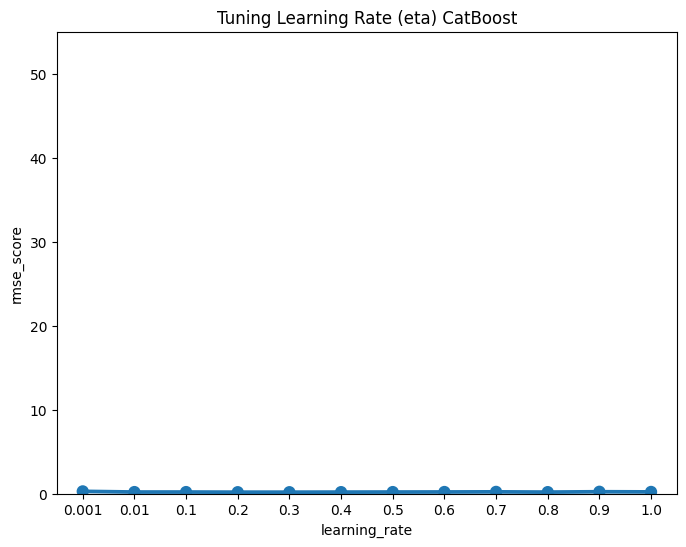

In [ ]:
learning_rate_list = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

learning_rate = []
rmse_score = []


for eta in learning_rate_list:
  cb = CatBoostClassifier(learning_rate=eta,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,cb.predict(X_test)))
  rmse_score.append(rmse)
  learning_rate.append(eta)


#create dataset eta
df_eta = pd.DataFrame({'learning_rate':learning_rate,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_eta,x='learning_rate',y='rmse_score')
plt.title('Tuning Learning Rate (eta) CatBoost')
plt.ylim(0,55)
plt.show()

In [ ]:
eta = 0.1
n_estimators = 200


Output streaming akan dipotong hingga 5000 baris terakhir.
4:	learn: 0.6078316	total: 30.9ms	remaining: 6.16s
5:	learn: 0.5930992	total: 34.8ms	remaining: 5.76s
6:	learn: 0.5752147	total: 38.6ms	remaining: 5.47s
7:	learn: 0.5588230	total: 42.6ms	remaining: 5.28s
8:	learn: 0.5473078	total: 46.6ms	remaining: 5.13s
9:	learn: 0.5344443	total: 51ms	remaining: 5.05s
10:	learn: 0.5240506	total: 55ms	remaining: 4.94s
11:	learn: 0.5073783	total: 58.9ms	remaining: 4.85s
12:	learn: 0.4906717	total: 63.5ms	remaining: 4.82s
13:	learn: 0.4820023	total: 67.4ms	remaining: 4.75s
14:	learn: 0.4762691	total: 68.6ms	remaining: 4.5s
15:	learn: 0.4616454	total: 72.7ms	remaining: 4.47s
16:	learn: 0.4514641	total: 76.7ms	remaining: 4.44s
17:	learn: 0.4383064	total: 80.9ms	remaining: 4.41s
18:	learn: 0.4287685	total: 85.4ms	remaining: 4.41s
19:	learn: 0.4154280	total: 89.3ms	remaining: 4.38s
20:	learn: 0.4076850	total: 93.2ms	remaining: 4.34s
21:	learn: 0.4002489	total: 97.6ms	remaining: 4.34s
22:	learn: 0.389

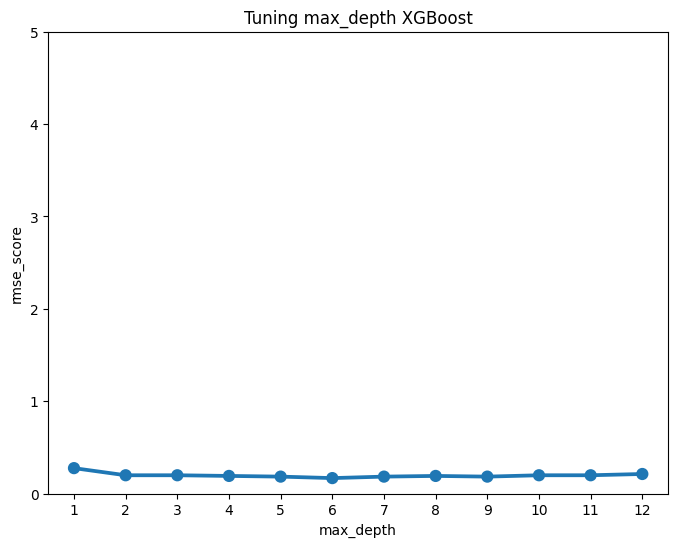

In [ ]:
max_depth = []
rmse_score = []

for depth in range(1,13):
  cb = CatBoostClassifier(max_depth=depth,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,cb.predict(X_test)))
  rmse_score.append(rmse)
  max_depth.append(depth)


#create dataset eta
df_max_depth = pd.DataFrame({'max_depth':max_depth,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_max_depth,x='max_depth',y='rmse_score')
plt.title('Tuning max_depth CatBoost')
plt.ylim(0,5)
plt.show()

In [ ]:
eta = 0.1
max_depth = 6
n_estimators = 200

Output streaming akan dipotong hingga 5000 baris terakhir.
4:	learn: 0.6224265	total: 10.3ms	remaining: 2.05s
5:	learn: 0.6104160	total: 11.9ms	remaining: 1.98s
6:	learn: 0.5987261	total: 13.6ms	remaining: 1.93s
7:	learn: 0.5854811	total: 16.2ms	remaining: 2.01s
8:	learn: 0.5745245	total: 17.8ms	remaining: 1.96s
9:	learn: 0.5653970	total: 19ms	remaining: 1.88s
10:	learn: 0.5535160	total: 21.1ms	remaining: 1.9s
11:	learn: 0.5348902	total: 25ms	remaining: 2.06s
12:	learn: 0.5245262	total: 27.1ms	remaining: 2.05s
13:	learn: 0.5128813	total: 28.8ms	remaining: 2.03s
14:	learn: 0.4971707	total: 31.6ms	remaining: 2.07s
15:	learn: 0.4894636	total: 33.3ms	remaining: 2.04s
16:	learn: 0.4796352	total: 34.9ms	remaining: 2.02s
17:	learn: 0.4703533	total: 36.5ms	remaining: 1.99s
18:	learn: 0.4581249	total: 39.1ms	remaining: 2.02s
19:	learn: 0.4485510	total: 41.3ms	remaining: 2.02s
20:	learn: 0.4419369	total: 43ms	remaining: 2.01s
21:	learn: 0.4321363	total: 44.8ms	remaining: 1.99s
22:	learn: 0.42504

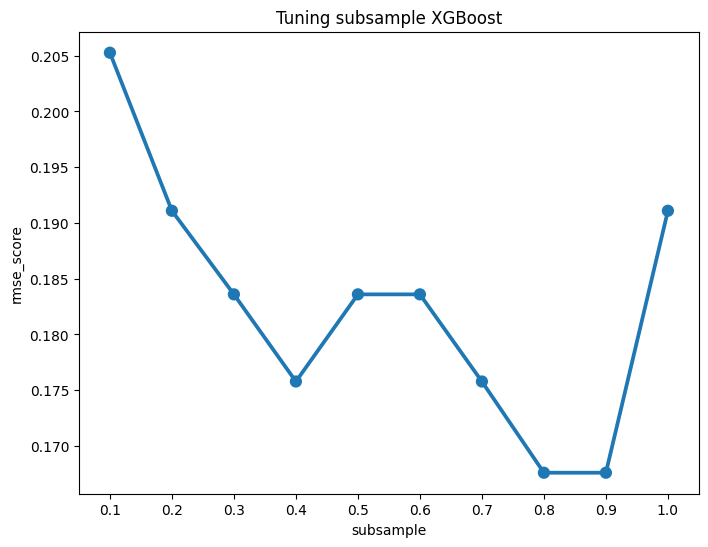

In [ ]:
subsample = []
rmse_score = []

for sub in [0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1]:
  cb = CatBoostClassifier(subsample=sub,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,cb.predict(X_test)))
  rmse_score.append(rmse)
  subsample.append(sub)


#create dataset eta
df_subsample = pd.DataFrame({'subsample':subsample,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_subsample,x='subsample',y='rmse_score')
plt.title('Tuning subsample CatBoost')
plt.show()

In [ ]:
eta = 0.1
max_depth = 6
n_estimators = 200
subsample = 0.8

I choose the paramater based on which has low point on graph (which means minimum error) for xgboost and catboost

In [ ]:
cb = CatBoostClassifier(random_state=42,verbose=500,class_weights={0:1,1:5},max_depth=5,early_stopping_rounds=30,boosting_type='Ordered') # creating an instance

In [ ]:
cb.fit(X_train,y_train)


predict_train = cb.predict(X_train)
predict_test = cb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

Learning rate set to 0.011981
0:	learn: 0.6756274	total: 7.78ms	remaining: 7.77s
500:	learn: 0.1157566	total: 4.57s	remaining: 4.55s
999:	learn: 0.0604226	total: 9.2s	remaining: 0us
r2 score train 0.8483933410762678
r2 score test 0.5721153846153848
MAE train 0.01544943820224719
MAE test 0.05337078651685393
MSE train 0.01544943820224719
MSE test 0.05337078651685393
RMSE train 0.12429576904403139
RMSE test 0.2310211819657538


In [ ]:
cb = CatBoostClassifier(learning_rate = eta,
                  max_depth = max_depth,
                  n_estimators = n_estimators,
                  subsample = subsample,
                  random_state=42,
                   verbose=500,class_weights={0:1,1:5},early_stopping_rounds=30,boosting_type='Ordered')

In [ ]:
cb.fit(X_train,y_train)


predict_train = cb.predict(X_train)
predict_test = cb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

0:	learn: 0.5640715	total: 14.3ms	remaining: 2.85s
199:	learn: 0.0207959	total: 1.64s	remaining: 0us
r2 score train 0.9793263646922183
r2 score test 0.6171558704453443
MAE train 0.002106741573033708
MAE test 0.047752808988764044
MSE train 0.002106741573033708
MSE test 0.047752808988764044
RMSE train 0.045899254602157845
RMSE test 0.21852416110985085


# Summary

XGBOOST after tuning:

r2 score train 0.8475498517761535

r2 score test 0.7111521502716216

MAE train 0.060625739917280076

MAE test 0.09665790719050113

MSE train 0.015535393765867447

MSE test 0.0360284907879861

RMSE train 0.12464105971094536

RMSE test 0.1898117245798744

CATBOOST after tuning:

r2 score train 0.9793263646922183

r2 score test 0.6171558704453443

MAE train 0.002106741573033708

MAE test 0.047752808988764044

MSE train 0.002106741573033708

MSE test 0.047752808988764044

RMSE train 0.045899254602157845

RMSE test 0.21852416110985085

### XGBoost Classifier is the best optimal model for our data as it is quite robust, immune to multicollinearity and has high R2 score and with minimum error on train and test.
Catboost tends to overfitting becase has good score in train but low in test, example R2 score and RMSE score.